# EDA and Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Graph Structure


### Nodes and Edges (PPI dataset)

The Protein-Protein Interaction dataset and protein metadata dataset are obtained from the <a href="https://string-db.org/cgi/download?sessionId=bLtv7nEpZD9a&species_text=Homo+sapiens&settings_expanded=0&min_download_score=0&filter_redundant_pairs=0&delimiter_type=txt">STRING</a> database.

#### Data Cleaning & EDA

In [2]:
# data = pd.read_csv('../9606.protein.links.v12.0.txt', sep='\t', names=['link_info'])
# data = data.loc[1:]
# data[['protein1', 'protein2', 'combined_score']] = data['link_info'].str.split(expand=True)
# data.drop(columns=['link_info'], inplace=True)
# data['combined_score'] = data['combined_score'].astype(int)
# data['protein1'] = data['protein1'].apply(lambda x: x.replace("9606.",""))
# data['protein2'] = data['protein2'].apply(lambda x: x.replace("9606.",""))
# data.to_csv("../cleaned_PPI_full_name.csv")

In [13]:
# PPI data
ppi_data = pd.read_csv('../cleaned_PPI_full_name.csv', index_col=0)

The PPI dataset contains 3 columns after cleaning -- `protein1`, `protein2` and `combined_score` -- which store information about the proteins involved in an interaction and an assigned score that represents the interaction strength.

In [4]:
ppi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13715404 entries, 1 to 13715404
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   protein1        object
 1   protein2        object
 2   combined_score  int64 
dtypes: int64(1), object(2)
memory usage: 418.6+ MB


In [ ]:
ppi_data['combined_score'].mean()

268.6240444685406

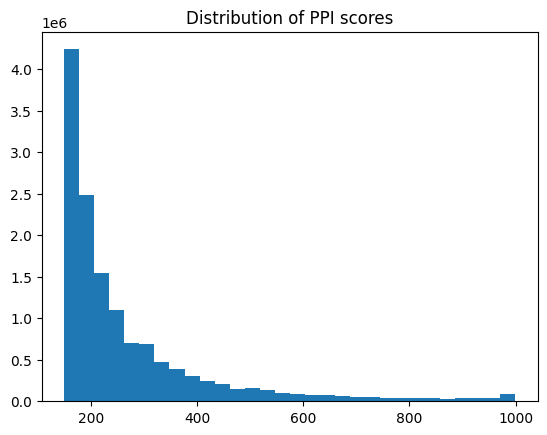

In [ ]:
plt.hist(ppi_data['combined_score'],bins=30)
plt.title("Distribution of PPI scores")
plt.show()

To reduce the data size and focus on only high-confidence interactions, we threshold the PPI dataset to only keep the top 5% scored interactions.

In [66]:
# select threshold
threshold = np.percentile(ppi_data['combined_score'], 95)
threshold

611.0

In [68]:
# threshold
filtered_ppi_data = ppi_data[ppi_data['combined_score'] >= threshold]
filtered_ppi_data.shape

(687742, 3)

## Node Features

### RNA-seq data

The RNA-seq data is obtained from <a href="https://www.proteinatlas.org/humanproteome/tissue/data#gtex_tissue_groups_rna">the Human Protein Atlas</a>, and contains transcript expression levels from RNA seq summarized per gene in 35 tissues based on 46 tissue subtypes and in the individual tissue subtypes. The data is obtained from GTEx.

#### EDA

In [69]:
rna_df = pd.read_csv('rna_tissue_gtex.tsv', sep='\t')

In [70]:
rna_df.head()

,Gene,Gene name,Tissue,TPM,pTPM,nTPM
0,ENSG00000000003,TSPAN6,adipose tissue,28.7,35.6,28.6
1,ENSG00000000003,TSPAN6,adrenal gland,15.2,18.4,17.6
2,ENSG00000000003,TSPAN6,amygdala,7.2,9.1,13.0
3,ENSG00000000003,TSPAN6,basal ganglia,7.8,9.6,12.4
4,ENSG00000000003,TSPAN6,breast,32.5,40.8,33.0


In [71]:
rna_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675206 entries, 0 to 675205
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Gene       675206 non-null  object 
 1   Gene name  675206 non-null  object 
 2   Tissue     675206 non-null  object 
 3   TPM        675206 non-null  float64
 4   pTPM       675206 non-null  float64
 5   nTPM       675206 non-null  float64
dtypes: float64(3), object(3)
memory usage: 30.9+ MB


In [72]:
rna_df.describe()

,TPM,pTPM,nTPM
count,675206.000000,675206.000000,675206.000000
mean,42.135715,53.171376,59.248355
std,747.153185,919.048568,1588.709947
min,0.000000,0.000000,0.000000
25%,0.400000,0.500000,0.400000
50%,4.200000,5.400000,5.000000
75%,15.300000,19.500000,17.200000
max,87660.200000,99788.700000,339891.800000


In [73]:
missing_values = rna_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Gene         0
Gene name    0
Tissue       0
TPM          0
pTPM         0
nTPM         0
dtype: int64


In [74]:
print("Unique genes:", rna_df['Gene'].nunique())
print("Unique tissues:", rna_df['Tissue'].nunique())

Unique genes: 20162
Unique tissues: 35


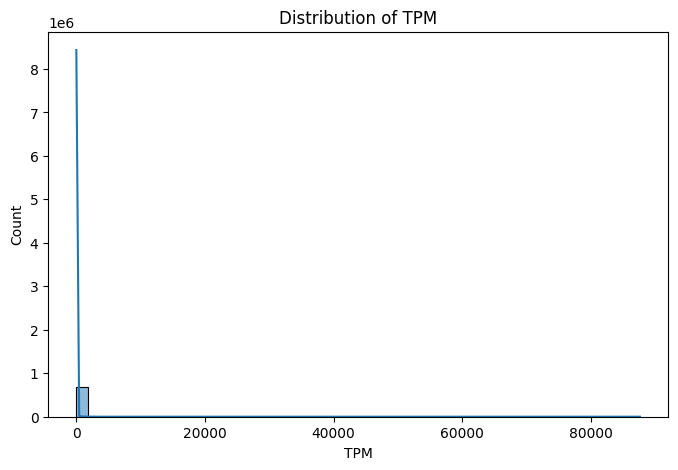

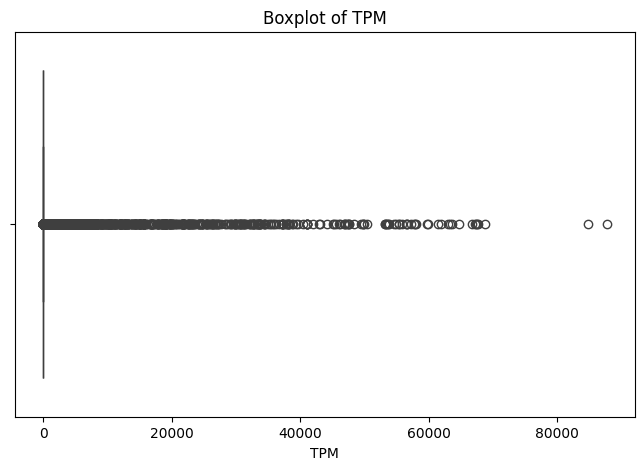

In [28]:
# Histogram of TPM
plt.figure(figsize=(8, 5))
sns.histplot(rna_df['TPM'], bins=50, kde=True)
plt.title('Distribution of TPM')
plt.xlabel('TPM')
plt.show()

# Boxplot to check for outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=rna_df['TPM'])
plt.title('Boxplot of TPM')
plt.show()

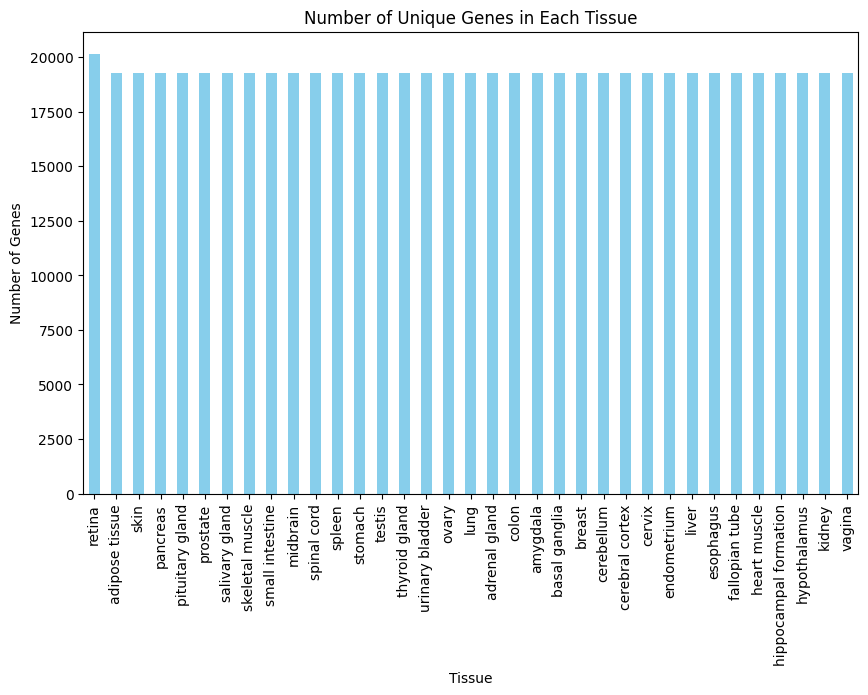

In [30]:
genes_per_tissue = rna_df.groupby('Tissue')['Gene'].nunique().sort_values(ascending=False)

# Plot the number of genes in each tissue
plt.figure(figsize=(10, 6))
genes_per_tissue.plot(kind='bar', color='skyblue')
plt.title('Number of Unique Genes in Each Tissue')
plt.ylabel('Number of Genes')
plt.xlabel('Tissue')
plt.xticks(rotation=90)
plt.show()

Tissue
heart muscle             52.542370
colon                    47.735145
kidney                   47.043418
cerebral cortex          46.594472
basal ganglia            45.826799
pancreas                 45.765374
adipose tissue           45.636012
skeletal muscle          44.912260
skin                     44.217424
liver                    43.918156
cervix                   43.844872
adrenal gland            42.599273
stomach                  42.370788
esophagus                42.215110
midbrain                 41.716552
hypothalamus             41.556960
hippocampal formation    41.485591
breast                   41.318639
urinary bladder          41.293117
cerebellum               41.276222
amygdala                 41.252974
spinal cord              41.210838
endometrium              41.113703
salivary gland           40.824639
vagina                   40.812213
small intestine          40.281984
pituitary gland          40.279409
fallopian tube           40.059063
ovary        

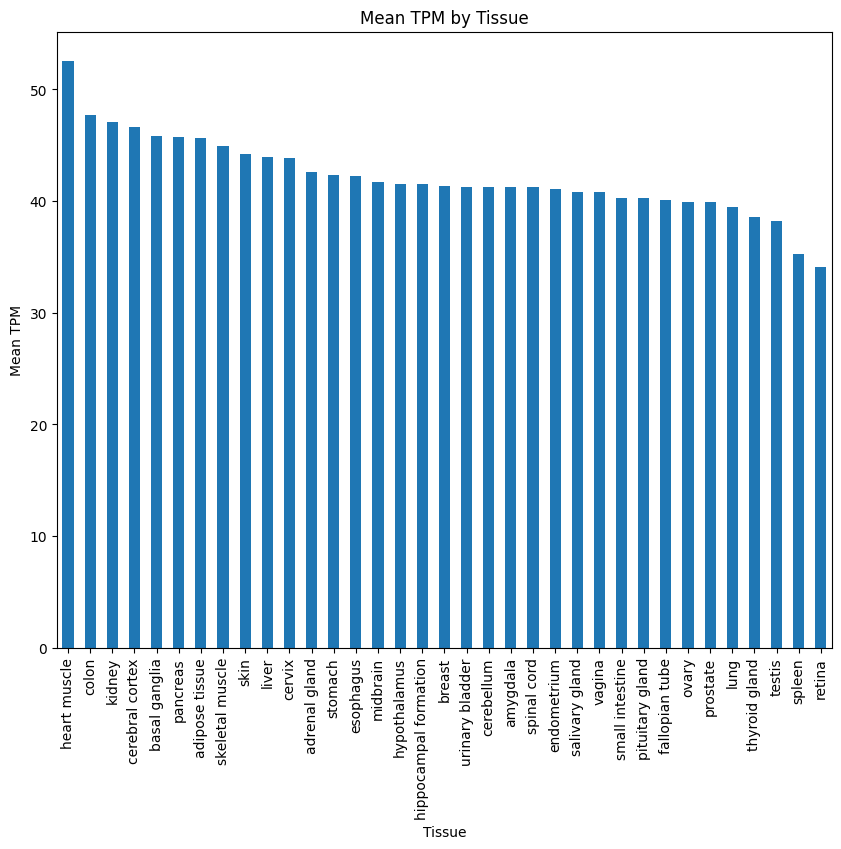

In [29]:
tissue_mean_tpm = rna_df.groupby('Tissue')['TPM'].mean().sort_values(ascending=False)
print(tissue_mean_tpm)

plt.figure(figsize=(10, 8))
tissue_mean_tpm.plot(kind='bar')
plt.title('Mean TPM by Tissue')
plt.ylabel('Mean TPM')
plt.xticks(rotation=90)
plt.show()

#### Match RNA to Protein and Create Feature Matrix

We utilize the `TPM` column as our feature for the nodes (proteins), which stands for "Transcripts per Million". These values are obtained by normalizing the transcript number by gene length and sequencing depth, so they are ready for us to use directly in the model. To match these values to the proteins, we first match the protein IDs with gene IDs using the package `pyensembl`.

In [ ]:
from pyensembl import EnsemblRelease
match_data = EnsemblRelease(104)
# match_data.download()
# match_data.index()

In [19]:
all_proteins = set(ppi_data['protein1']).union(set(ppi_data['protein2']))
all_proteins = list(all_proteins)
print("Number of unique proteins: "+str(len(all_proteins)))
all_proteins[:10]

Number of unique proteins: 19622


['ENSP00000360191',
 'ENSP00000475939',
 'ENSP00000448165',
 'ENSP00000381148',
 'ENSP00000363394',
 'ENSP00000326598',
 'ENSP00000375921',
 'ENSP00000359240',
 'ENSP00000488995',
 'ENSP00000316605']

In [22]:
# Map protein id to gene id and skip unmapped protein id
protein_to_gene = {}
for protein in all_proteins:
    try:
        gene_id = data.gene_id_of_protein_id(protein)
        protein_to_gene[protein] = gene_id
    except ValueError:
        continue

print(f"Number of successfully mapped proteins: {len(protein_to_gene)}")
print(f"Percentage of proteins with mappings: {len(protein_to_gene) / len(all_proteins) * 100:.2f}%")

Number of successfully mapped proteins: 19368
Percentage of proteins with mappings: 98.71%


In [27]:
rna_df = rna_df[['Gene','Tissue','TPM']] # keep necessary columns
rna_df.head()

,Gene,Tissue,TPM
0,ENSG00000000003,adipose tissue,28.7
1,ENSG00000000003,adrenal gland,15.2
2,ENSG00000000003,amygdala,7.2
3,ENSG00000000003,basal ganglia,7.8
4,ENSG00000000003,breast,32.5


In [28]:
rna_df['Tissue'].nunique()

35

In [39]:
gene_tissue_pivot = rna_df.pivot_table(
    index='Gene',       
    columns='Tissue',   
    values='TPM',       
    aggfunc='mean'      # In case of duplicates, use the mean value
)
gene_tissue_pivot.head()

Tissue,adipose tissue,adrenal gland,amygdala,basal ganglia,breast,cerebellum,cerebral cortex,cervix,colon,endometrium,...,skeletal muscle,skin,small intestine,spinal cord,spleen,stomach,testis,thyroid gland,urinary bladder,vagina
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,28.7,15.2,7.2,7.8,32.5,2.7,5.7,30.4,31.7,24.8,...,2.1,9.2,16.3,6.0,8.4,9.4,97.1,18.9,26.3,24.7
ENSG00000000005,20.8,0.0,0.1,0.0,11.7,0.0,0.1,0.1,0.5,0.1,...,1.6,3.1,0.4,0.0,0.1,0.1,0.1,0.2,0.2,0.2
ENSG00000000419,33.4,38.2,12.4,15.0,33.6,24.3,21.4,35.6,31.1,38.9,...,26.3,30.0,29.7,15.5,33.6,25.4,42.5,34.4,32.8,34.6
ENSG00000000457,5.5,4.3,1.5,1.7,6.7,5.2,2.3,7.8,5.5,6.5,...,3.6,6.9,5.5,2.3,5.8,3.9,6.5,7.3,7.8,6.8
ENSG00000000460,1.8,0.9,0.4,0.4,1.7,3.4,0.6,2.1,1.4,1.8,...,0.4,1.7,1.5,1.0,1.7,0.9,8.5,1.6,1.6,1.8


In [41]:
gene_tissue_pivot.isna().sum()

Tissue
adipose tissue           896
adrenal gland            896
amygdala                 896
basal ganglia            896
breast                   896
cerebellum               896
cerebral cortex          896
cervix                   896
colon                    896
endometrium              896
esophagus                896
fallopian tube           896
heart muscle             896
hippocampal formation    896
hypothalamus             896
kidney                   896
liver                    896
lung                     896
midbrain                 896
ovary                    896
pancreas                 896
pituitary gland          896
prostate                 896
retina                     0
salivary gland           896
skeletal muscle          896
skin                     896
small intestine          896
spinal cord              896
spleen                   896
stomach                  896
testis                   896
thyroid gland            896
urinary bladder          896
vagina 

In [ ]:
gene_tissue_pivot.dropna(inplace=True) # drop the 896 genes that have little available data

In [47]:
gene_tissue_pivot.reset_index(inplace=True)

In [48]:
gene_tissue_pivot.shape

(19266, 36)

In [212]:
protein_gene_conversion = pd.DataFrame(protein_to_gene.keys(),protein_to_gene.values()).reset_index()

In [ ]:
protein_gene_conversion.columns = ['Gene', 'Protein']

protein_gene_conversion.to_csv('Data/protein_gene_conversion.csv', index=False)

In [218]:
gene_tissue_pivot.shape

(19266, 36)

In [222]:
match_feature_mat = gene_tissue_pivot.merge(protein_gene_conversion, on='Gene', how='right')

In [231]:
print(f"Number of unmatched proteins: {match_feature_mat.amygdala.isna().sum()}")

Number of unmatched proteins: 280


In [233]:
match_feature_mat = match_feature_mat.dropna().drop(columns = ['Gene'])

In [242]:
# adjust column order
match_feature_mat = match_feature_mat[['Protein']+list(match_feature_mat.columns[:-1])]

In [243]:
print(f"Feature matrix created for {match_feature_mat.shape[0]} proteins.")

Feature matrix created for 19088 proteins.


In [244]:
match_feature_mat.head()

,Protein,adipose tissue,adrenal gland,amygdala,basal ganglia,breast,cerebellum,cerebral cortex,cervix,colon,...,skeletal muscle,skin,small intestine,spinal cord,spleen,stomach,testis,thyroid gland,urinary bladder,vagina
0,ENSP00000360191,0.3,0.1,0.0,0.0,1.8,0.5,0.0,2.2,1.0,...,0.1,0.7,0.2,0.0,0.0,0.3,0.0,0.0,4.6,0.6
1,ENSP00000475939,0.1,1.5,0.1,0.2,0.0,0.0,0.0,0.6,0.0,...,0.1,0.3,0.2,0.0,0.0,0.1,0.4,1.1,0.0,0.1
2,ENSP00000448165,4.1,2.0,2.9,3.5,3.9,7.4,4.8,5.4,4.4,...,1.6,3.2,4.9,3.9,6.7,2.2,2.8,4.3,3.9,4.1
3,ENSP00000381148,84.6,68.7,23.4,28.0,81.3,85.7,30.6,101.3,105.5,...,40.8,77.8,72.8,34.8,67.3,64.1,42.6,80.2,89.3,75.4
4,ENSP00000363394,0.1,1.0,0.0,0.0,0.5,0.0,0.1,0.2,0.1,...,1.9,0.6,0.4,0.0,0.0,0.1,0.3,11.7,0.6,0.0


Now that we have the RNA-seq TPM feature matrix for the genes corresponding to the proteins (nodes) in the tissues, we proceed to get 10 principle components for the feature matrix to reduce dimensionality.

In [76]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [194]:
def get_pc(mat, num=10):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(mat)
    pca = PCA(n_components=num)  
    principal_components = pca.fit_transform(df_scaled)
    return principal_components, pca

In [195]:
features_only = match_feature_mat.iloc[:,1:].values

principal_components_rna, pca_rna = get_pc(features_only)

In [196]:
print("Explained variance ratio:", pca_rna.explained_variance_ratio_)
print("Cumulative explained variance:", pca_rna.explained_variance_ratio_.cumsum())

Explained variance ratio: [0.81998713 0.04013548 0.02737836 0.02037357 0.01771295 0.01366705
 0.01215161 0.00784211 0.00567791 0.00528535]
Cumulative explained variance: [0.81998713 0.86012261 0.88750097 0.90787453 0.92558748 0.93925453
 0.95140614 0.95924825 0.96492616 0.97021151]


In [197]:
protein_keep = match_feature_mat['Protein']
pc_df = pd.DataFrame(principal_components_rna)

In [198]:
pc_df.index = protein_keep

In [91]:
pc_df.to_csv("Data/PPI_RNA_seq_10PCs.csv")

In [57]:
match_feature_mat.to_csv("Data/PPI_RNA_seq_full.csv", index=False)

In [60]:
print("Percentage of proteins after preprocessing with proper RNA feature: " + str(match_feature_mat.shape[0]/(ppi_data['protein1'].nunique())))

Percentage of proteins after preprocessing with proper RNA feature: 0.97242890632963


### Protein Expression

In [148]:
protein_df = pd.read_csv('../normal_ihc_data.tsv', sep='\t')

#### Data Cleaning & EDA

In [149]:
# Display basic information about the DataFrame
print(protein_df.info())

# Show summary statistics for numeric columns
print(protein_df.describe())

# Check for missing values in each column
print(protein_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198185 entries, 0 to 1198184
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   Gene             1198185 non-null  object
 1   Gene name        1198185 non-null  object
 2   Tissue           1196352 non-null  object
 3   IHC tissue name  1196352 non-null  object
 4   Cell type        1196352 non-null  object
 5   Level            1196352 non-null  object
 6   Reliability      1198185 non-null  object
dtypes: object(7)
memory usage: 64.0+ MB
None
                   Gene Gene name   Tissue IHC tissue name        Cell type  \
count           1198185   1198185  1196352         1196352          1196352   
unique            15302     15296       57              63              148   
top     ENSG00000157404    NPIPA9     Skin          Skin 1  glandular cells   
freq                166       170    93523           64952           259573   

               Level Re

In [102]:
print("Unique genes:", protein_df['Gene'].nunique())
print("Unique tissues:", protein_df['Tissue'].nunique())
print("Unique cell types:", protein_df['Cell type'].nunique())
print("Unique levels:", protein_df['Level'].nunique())
print("Unique reliability values:", protein_df['Reliability'].nunique())

Unique genes: 15302
Unique tissues: 57
Unique cell types: 148
Unique levels: 7
Unique reliability values: 4


count       57.000000
mean      8756.578947
std       4548.184351
min          1.000000
25%      10806.000000
50%      11108.000000
75%      11139.000000
max      11144.000000
Name: Gene, dtype: float64


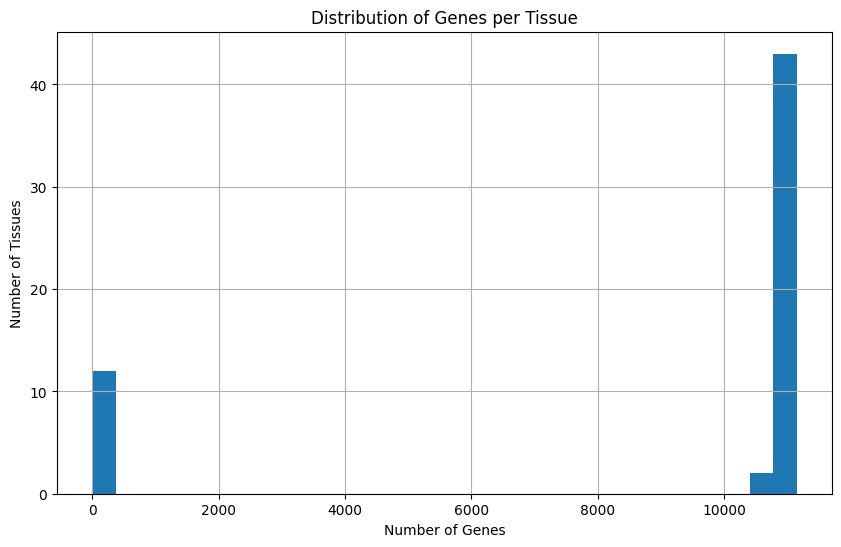

In [113]:
# Number of genes expressed in each tissue
tissue_gene_counts = protein_df.groupby('Tissue')['Gene'].nunique()
print(tissue_gene_counts.describe())

# Plot distribution of genes per tissue
plt.figure(figsize=(10, 6))
tissue_gene_counts.hist(bins=30)
plt.title('Distribution of Genes per Tissue')
plt.xlabel('Number of Genes')
plt.ylabel('Number of Tissues')
plt.show()

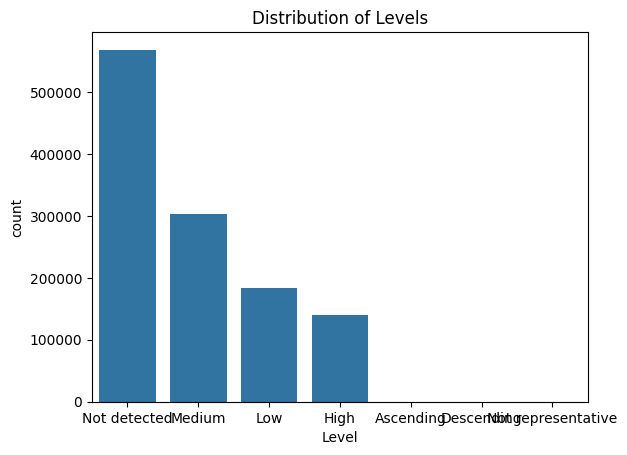

In [108]:
# Plot distribution of 'Level'
sns.countplot(data=protein_df, x='Level', order=protein_df['Level'].value_counts().index)
plt.title('Distribution of Levels')
plt.show()

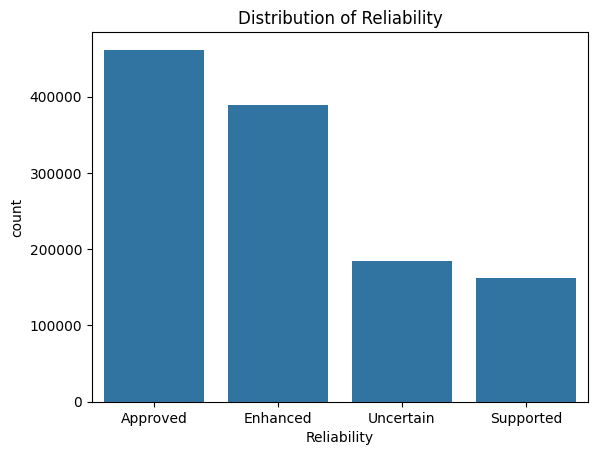

In [109]:
# Plot distribution of 'Reliability'
sns.countplot(data=protein_df, x='Reliability', order=protein_df['Reliability'].value_counts().index)
plt.title('Distribution of Reliability')
plt.show()

In [110]:
protein_df['Reliability'].value_counts()/protein_df.shape[0]

Approved     0.385172
Enhanced     0.324913
Uncertain    0.154205
Supported    0.135710
Name: Reliability, dtype: float64

We will store the measurements with a `Reliability` that is not "uncertain" levels of protein expression in another dataframe.

In [162]:
protein_df_reliable = protein_df[protein_df['Reliability']!='Uncertain']
protein_df_reliable.shape[0]/protein_df.shape[0]

0.8470566103990569

We will also drop the proteins with missing tissue/cell type information.

In [151]:
protein_df.isna().sum()

Gene                  0
Gene name             0
Tissue             1833
IHC tissue name    1833
Cell type          1833
Level              1833
Reliability           0
dtype: int64

In [154]:
protein_df = protein_df.dropna()

#### Match Features to Protein and Create Feature Matrix

We decide to use the `Level` column as our features for each protein. We will keep only the 'Not detected', 'Low', 'Medium', 'High' in this column and perform one-hot encoding on them.

In [155]:
protein_df.Level.unique()

array(['Not detected', 'Medium', 'High', 'Low', 'Ascending', 'Descending',
       'Not representative'], dtype=object)

In [158]:
keep_levels_dict = {'Not detected':0, 'Low':1, 'Medium':2, 'High':3}
print("Number of rows dropped: " + str(protein_df[~protein_df['Level'].isin(keep_levels_dict.keys())].shape[0]))
protein_df = protein_df[protein_df['Level'].isin(keep_levels_dict.keys())]

Number of rows dropped: 282


In [159]:
protein_df['Level_OHE'] = protein_df['Level'].map(keep_levels_dict)
protein_df.head()

,Gene,Gene name,Tissue,IHC tissue name,Cell type,Level,Reliability,Level_OHE
0,ENSG00000000003,TSPAN6,Adipose tissue,Adipose tissue,adipocytes,Not detected,Approved,0
1,ENSG00000000003,TSPAN6,Adrenal gland,Adrenal gland,glandular cells,Not detected,Approved,0
2,ENSG00000000003,TSPAN6,Appendix,Appendix,glandular cells,Medium,Approved,2
3,ENSG00000000003,TSPAN6,Appendix,Appendix,lymphoid tissue,Not detected,Approved,0
4,ENSG00000000003,TSPAN6,Bone marrow,Bone marrow,hematopoietic cells,Not detected,Approved,0


In [160]:
protein_df['Level_OHE'].unique()

array([0, 2, 3, 1])

In [163]:
# gt = protein_df.groupby('Tissue')['Gene'].nunique()
# gt

We'd like to have a separate measurement of level for protein expression in each cell type within each tissue.

In [164]:
(protein_df['IHC tissue name'] != protein_df['Tissue']).sum()

229744

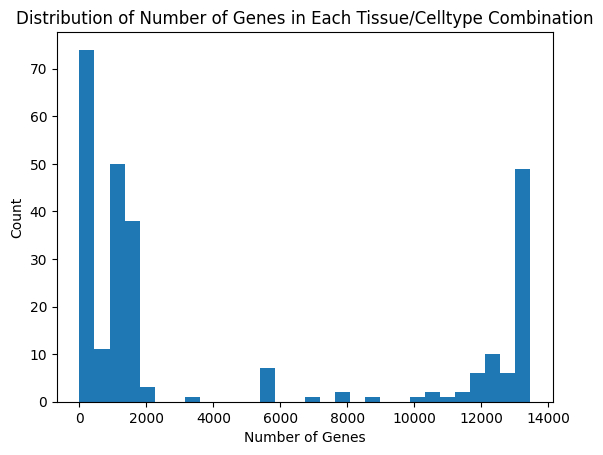

In [165]:
combination_info = protein_df.groupby(['IHC tissue name','Cell type'])['Gene'].count().reset_index()
plt.hist(combination_info['Gene'], bins=30)
plt.title("Distribution of Number of Genes in Each Tissue/Celltype Combination")
plt.xlabel("Number of Genes")
plt.ylabel("Count")
plt.show()

In [186]:
# threshold???
combined_keep = combination_info[combination_info['Gene']>13000]
combinations_keep = combined_keep['IHC tissue name'] + ' / ' + combined_keep['Cell type']

In [187]:
combinations_keep

0                      Adipose tissue / adipocytes
4                  Adrenal gland / glandular cells
14               Bone marrow / hematopoietic cells
15                             Breast / adipocytes
16                        Breast / glandular cells
17                    Breast / myoepithelial cells
26                           Caudate / glial cells
27                        Caudate / neuronal cells
56             Cerebral cortex / endothelial cells
57                   Cerebral cortex / glial cells
58                Cerebral cortex / neuronal cells
60                      Cerebral cortex / neuropil
66                       Colon / endothelial cells
93     Endometrium 1 / cells in endometrial stroma
94                 Endometrium 1 / glandular cells
95     Endometrium 2 / cells in endometrial stroma
96                 Endometrium 2 / glandular cells
97                    Epididymis / glandular cells
98           Esophagus / squamous epithelial cells
109                  Gallbladde

In [188]:
protein_df['Tissue_CellType'] = protein_df['IHC tissue name'] + ' / ' + protein_df['Cell type']

unique_combinations = protein_df['Tissue_CellType'].nunique()
print(f"Number of unique tissue/cell type combinations: {unique_combinations}")

Number of unique tissue/cell type combinations: 265


In [189]:
protein_df_keep_comb = protein_df[protein_df['Tissue_CellType'].isin(combinations_keep.values)]
protein_df_keep_comb.shape[0]/protein_df.shape[0]

0.5484361283202488

In [190]:
# Pivot the data: Genes as rows, Tissue/CellType as columns, and Level as values
ohe_df = protein_df_keep_comb.pivot_table(
    index='Gene',
    columns='Tissue_CellType',
    values='Level_OHE',
    aggfunc='max'  
)

ohe_df.reset_index(inplace=True)

In [191]:
ohe_df.isna().sum().sum()

4013

In [192]:
ohe_df.shape

(13469, 50)

In [203]:
ohe_df_no_missing = ohe_df.dropna()
ohe_df_no_missing.head()

Tissue_CellType,Gene,Adipose tissue / adipocytes,Adrenal gland / glandular cells,Bone marrow / hematopoietic cells,Breast / adipocytes,Breast / glandular cells,Breast / myoepithelial cells,Caudate / glial cells,Caudate / neuronal cells,Cerebral cortex / endothelial cells,...,Spleen / cells in white pulp,Stomach 1 / glandular cells,Stomach 2 / glandular cells,Testis / Leydig cells,Thyroid gland / glandular cells,Tonsil / germinal center cells,Tonsil / non-germinal center cells,Tonsil / squamous epithelial cells,Urinary bladder / urothelial cells,Vagina / squamous epithelial cells
0,ENSG00000000003,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,2.0,2.0,1.0,2.0,0.0,0.0,3.0,3.0,3.0
1,ENSG00000000419,2.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,...,2.0,3.0,3.0,3.0,2.0,1.0,2.0,2.0,2.0,2.0
3,ENSG00000000460,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,...,0.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0
5,ENSG00000000971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,ENSG00000001036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [245]:
match_feature_mat_protein = ohe_df_no_missing.merge(protein_gene_conversion, on='Gene', how='right')
print(f"Number of unmatched proteins: {ohe_df_no_missing['Adipose tissue / adipocytes'].isna().sum()}")
match_feature_mat_protein = match_feature_mat_protein.dropna().drop(columns = ['Gene'])

Number of unmatched proteins: 0


In [247]:
# adjust column order
match_feature_mat_protein = match_feature_mat_protein[['Protein']+list(match_feature_mat_protein.columns[:-1])]
print(f"Feature matrix created for {match_feature_mat_protein.shape[0]} proteins.")

Feature matrix created for 10432 proteins.


In [256]:
features_only_protein = match_feature_mat_protein.iloc[:,1:].values

principal_components_protein, pca_protein = get_pc(features_only_protein,10)

In [257]:
print("Explained variance ratio:", pca_protein.explained_variance_ratio_)
print("Cumulative explained variance:", pca_protein.explained_variance_ratio_.cumsum())

Explained variance ratio: [0.5345235  0.05026245 0.03675229 0.03263917 0.0230103  0.02149211
 0.01801624 0.01665362 0.01586334 0.01376434]
Cumulative explained variance: [0.5345235  0.58478595 0.62153824 0.65417741 0.67718771 0.69867982
 0.71669606 0.73334968 0.74921302 0.76297736]


In [258]:
protein_keep_feature = match_feature_mat_protein['Protein']
pc_df_protein = pd.DataFrame(principal_components_protein)
pc_df_protein.index = protein_keep_feature

In [260]:
pc_df_protein.to_csv("Data/PPI_protein_expression_10PCs.csv")
match_feature_mat_protein.to_csv("Data/PPI_protein_expression_full.csv", index=False)